In [1]:
#setup fastai notebook
!pip install -Uqq fastbook fastai
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.4MB/s 
     |████████████████████████████████| 194kB 15.4MB/s 
     |████████████████████████████████| 1.1MB 17.8MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
Mounted at /content/gdrive


In [2]:
#@title imports
from fastbook import *
from fastai.vision.all import *

from fastprogress import fastprogress
from torchvision.models import *

In [3]:
# true for imagewoof, else imagenette
woof = True
if woof:
  path = untar_data(URLs.IMAGEWOOF)
else:
  path = untar_data(URLs.IMAGENETTE)

files = get_image_files(path/"train")
print("Training images: ", len(get_image_files(path/"train")),'(' ,round(len(get_image_files(path/"train"))*100/len(get_image_files(path)),2), '%)')
print("Validation images: ", len(get_image_files(path/"val")),'(' ,round(len(get_image_files(path/"val"))*100/len(get_image_files(path)),2), '%)')


Training images:  9025 ( 69.67 %)
Validation images:  3929 ( 30.33 %)


random large crop
randomized small resize crop
just fit to dataset
resize to 128


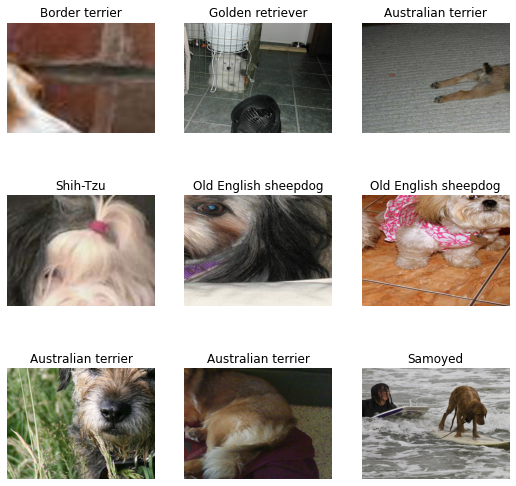

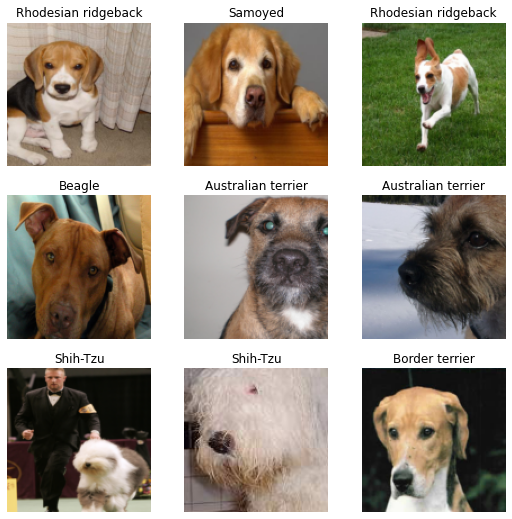

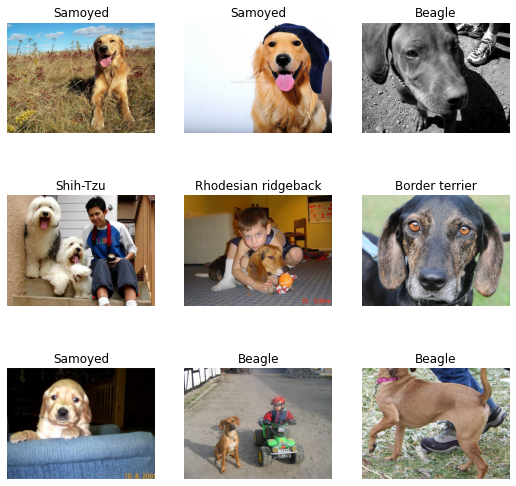

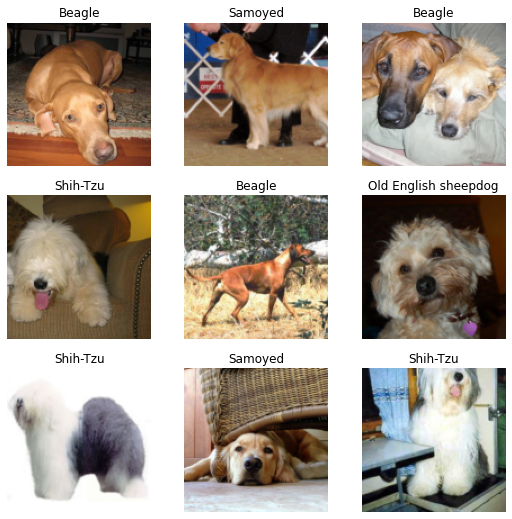

In [4]:
#create dict to show better readable labels
if woof:
  lbl_dict = dict(
    n02093754='Australian terrier', 
    n02089973='Border terrier', 
    n02099601='Samoyed', 
    n02087394='Beagle', 
    n02105641='Shih-Tzu', 
    n02096294='English foxhound', 
    n02088364='Rhodesian ridgeback', 
    n02115641='Dingo', 
    n02111889='Golden retriever', 
    n02086240='Old English sheepdog'
  )
else:
  lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
  )
#get all the images
fnames = get_image_files(path)
#function to return human readable filenames
def label_func(fname):
  return lbl_dict[parent_label(fname)]


item_tf = [0 for x in range(4)]
name = [0 for x in range(len(item_tf))]
dblock = [0 for x in range(len(item_tf))]
dls = [0 for x in range(len(item_tf))]
learn = [0 for x in range(len(item_tf))]

#randomtf to larger image
item_tf[0] = RandomResizedCrop((375,500))
name[0] = 'random large crop'
# randomresize_crop to smaller image
item_tf[1] = RandomResizedCrop(128, min_scale=0.35)
name[1] = 'randomized small resize crop'
#no tf, just fit into the dataset size
item_tf[2] = Resize((375,500))
name[2] = 'just fit to dataset'
#resize
item_tf[3] = Resize(128, method='crop')
name[3] = 'resize to 128'

for x in range(len(dblock)):
  #define a datablock
  dblock[x] = DataBlock(
      #set input to image and the goal to ctaegories
      blocks = (ImageBlock, CategoryBlock),
      #get names inside data block
      get_items = get_image_files,
      #label the items uin a readbale manner
      get_y=label_func,
      #split between test and trainining by folder two ages above
      splitter = GrandparentSplitter(valid_name='val'),
      #randomize the input & batch transform
      item_tfms = item_tf[x], 
     # batch_tfms= Normalize.from_stats(*imagenet_stats)
      )
for x in range(len(dls)):
  #convert to dataloader
  dls[x] = dblock[x].dataloaders(path)
  print(name[x])
  dls[x].show_batch()

random large crop


epoch,train_loss,valid_loss,accuracy,time
0,2.754600,2.389004,0.160092,03:04
1,2.600932,2.593300,0.132604,03:02
2,2.431180,2.199533,0.180708,03:02
3,2.240666,2.274420,0.174854,03:03
4,2.182377,1.994055,0.274116,03:02


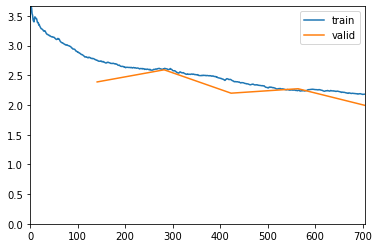

randomized small resize crop


epoch,train_loss,valid_loss,accuracy,time
0,2.722290,2.271941,0.165946,01:12
1,2.521019,2.486291,0.167727,01:12
2,2.431498,3.399152,0.207432,01:12
3,2.274675,6.956262,0.233647,01:12
4,2.126466,1.948018,0.290659,01:12


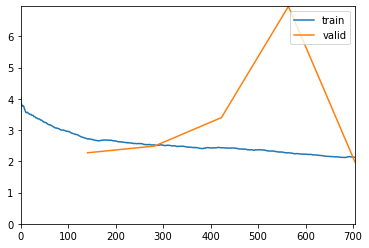

just fit to dataset


epoch,train_loss,valid_loss,accuracy,time
0,2.733323,3.638886,0.099771,02:55
1,2.600930,2.282290,0.132604,02:55
2,2.489074,2.935971,0.168745,02:56
3,2.270167,2.323677,0.227284,02:55
4,2.147646,1.992769,0.305676,02:56


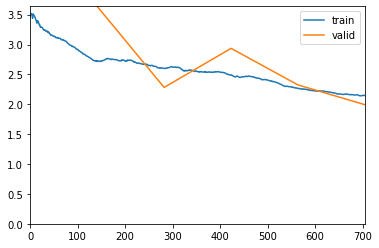

resize to 128


epoch,train_loss,valid_loss,accuracy,time
0,2.701678,2.211490,0.205396,01:12
1,2.625958,6.290208,0.118096,01:12
2,2.396596,2.142577,0.205396,01:12
3,2.240365,2.429482,0.258844,01:12
4,2.108115,2.014197,0.296513,01:12


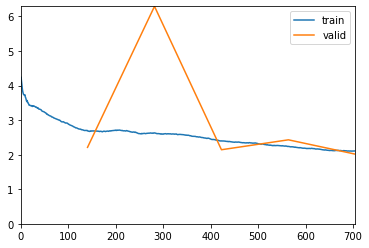

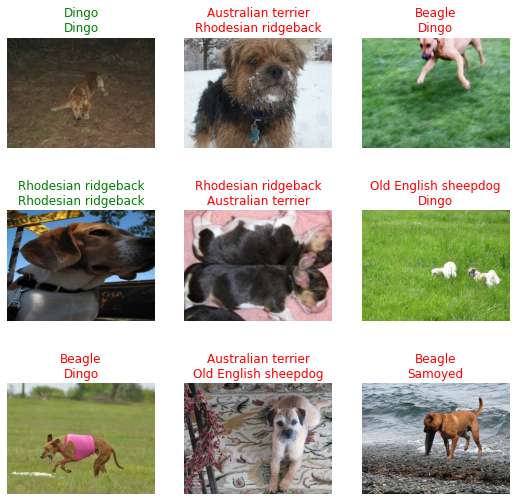

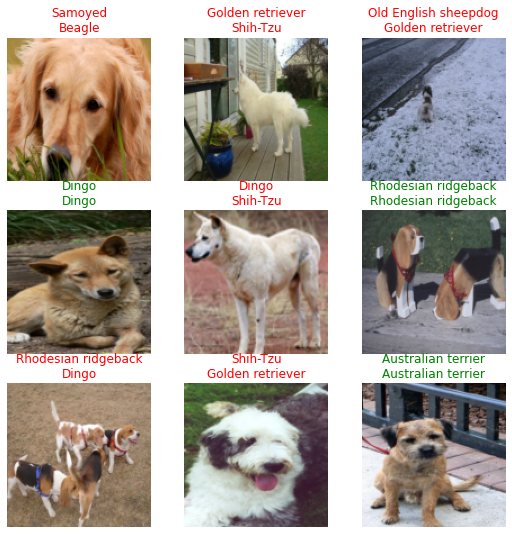

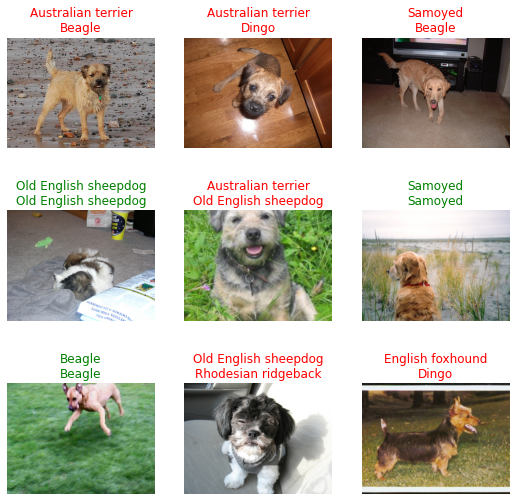

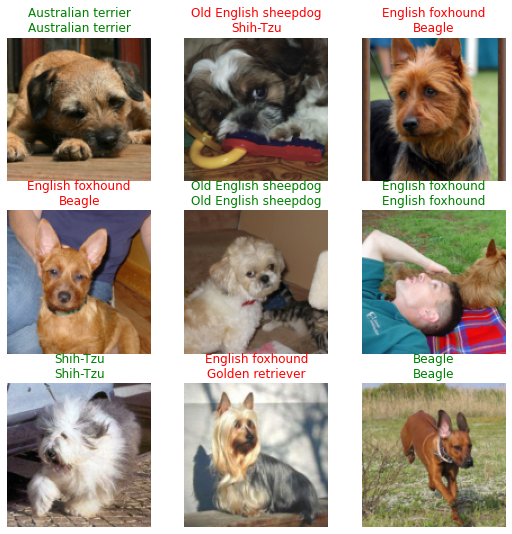

In [6]:
#train
for x in range(len(learn)):
  print(name[x])
  callbacks = [CSVLogger(fname='model_logs_itemtf_'+str(name[x])+'_5_epochs.csv'),ShowGraphCallback()]
  learn[x] = cnn_learner(dls[x], resnet34, metrics=accuracy, pretrained=False, cbs=callbacks)
  learn[x].fit_one_cycle(5, 5e-3)
  learn[x].show_results()